<a href="https://colab.research.google.com/github/odheL42/NSU-senior-project/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Подготовка и скачивание с github файлов

In [ ]:
!ssh-keygen -t rsa -b 4096 -f ~/.ssh/id_rsa -N ''

Generating public/private rsa key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_rsa
Your public key has been saved in /root/.ssh/id_rsa.pub
The key fingerprint is:
SHA256:zNyAvReIeZtRF1YycA7AzPrAymU8fqYILMfjlsaabds root@b224ede1816d
The key's randomart image is:
+---[RSA 4096]----+
|       +..+.Bo.  |
|       =+o * o   |
|     o+.* . .    |
|      O= B .     |
| o . = +S o      |
|. * o . +.       |
| = + . +         |
| oB.. .          |
|o=o.E            |
+----[SHA256]-----+


In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts

# github.com:22 SSH-2.0-babeld-fdcea1d49


In [ ]:
!cat ~/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQCgsldLO9bYvJkTHHTKlVU/3ZOejSRZOGxte/Pa2kciAidJgvShyWG9rWN7h49sLpEb5irtfXsgWOT6lOr3VrgmZ16X5XTaF3/ciPIMQaO6tkSwb0oA2BNvr6PV6TcE/yaybNnkzmWSJpYffGSAS7/S6qicHFHd4BYvEDHX7okkCG4+uAKRbGLC12sK/ABrZz0KQ43jdjA70hwmNjWFDArd2K4to98uXkUhCcmYaglUph/bOph77N9o8uxel5FiUIv4N7wfW+G+Kj0z6ot50Ww4VHlhzMnZhxqnEkOgwKMh7SJzGFCDSqhkW1rU4o85EV7UGZW5bhb2nF88CPI4sg+KaKY8SkrMfeHHSn0mFpmDY1rcaBp3OSxE5/+wBPVbzxfCUyj6xLnXKRvdBPNOeZmAg3IgHtQAp6Stx3lYIRngXeldZLVSn8AqyCteV6Y0gxBZbxYLq6jTt+S3aAC5NJuXQPQEEqnu/xXD0gE/3aoHK2e+JO0wGivGwSQYvcHoYMQf71be4OgtFKQ/5WTvoZmitEXkANyZhMguB7AF/ZPrO9zov1IejRXkeNlE+vz8mO5x/JX2dFSvt70+FBp2kAl+zYA/Oc2HjWXSpdT6J13fz9lI+3naFBlp3ifCLP07GqnLnGMNoyaQAf4lb6lvJY4KuvvuUMhPlG+w6bZ9HhpNDQ== root@b224ede1816d


In [ ]:
!ssh -T git@github.com

Hi odheL42! You've successfully authenticated, but GitHub does not provide shell access.


In [ ]:
!git clone git@github.com:odheL42/NSU-senior-project.git frames

Cloning into 'frames'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 17 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (17/17), 8.37 KiB | 8.37 MiB/s, done.
Resolving deltas: 100% (4/4), done.


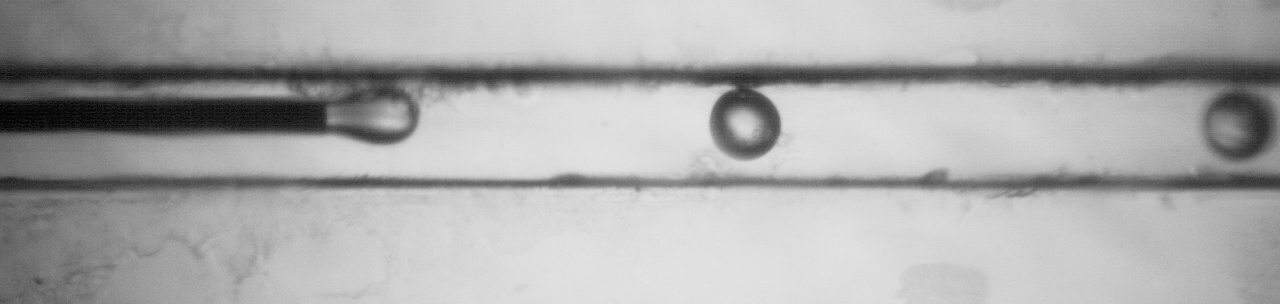

In [ ]:
from PIL import Image
Image.open('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0022.jpg')

In [ ]:
№from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Получение кадров из видео, сохранение их на github

In [ ]:
import cv2
import os
import numpy as np
from google.colab.patches import cv2_imshow

https://note.nkmk.me/en/python-opencv-video-to-still-image/

In [ ]:


def save_all_frames(video_path, dir_path, basename, ext='jpg'):
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        return

    os.makedirs(dir_path, exist_ok=True)
    base_path = os.path.join(dir_path, basename)

    digit = len(str(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))))

    n = 0

    while True:
        ret, frame = cap.read()

        if ret:
            frame_cut = frame[:, 325:]
            cv2.imwrite('{}_{}.{}'.format(base_path, str(n).zfill(digit), ext), frame_cut)
            n += 1
        else:
            return

save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted', 'sample_video_img')

#save_all_frames('/content/drive/MyDrive/dataset_nsu_senProj/oil_0p05ml_water_0ml.avi', '/content/drive/MyDrive/dataset_nsu_senProj/result_cutted', 'sample_video_img', 'png')


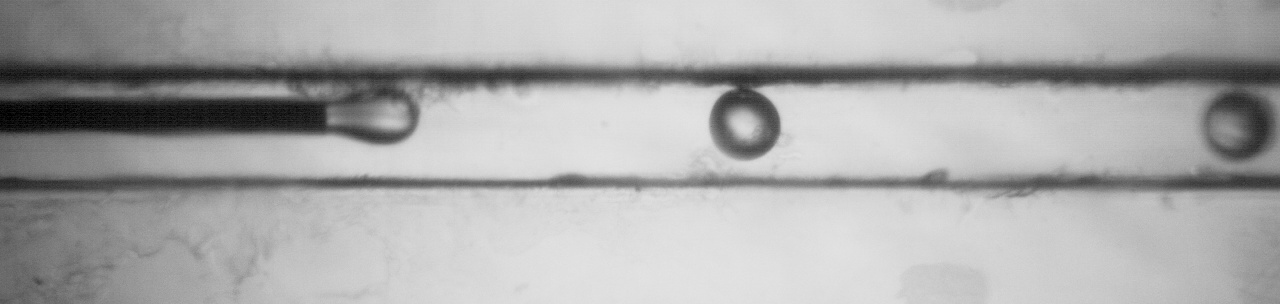

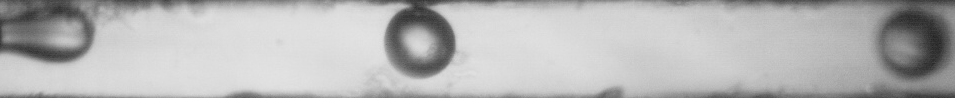

In [ ]:
from google.colab.patches import cv2_imshow
frame_to_cut = '/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg'
res = cv2.imread(frame_to_cut)
res1 = res[82:180, 325:]
#Image.open(frame_to_cut)
print('\n')
cv2_imshow(res)
cv2_imshow(res1)

# Обраротка кадра (стандарт)

original image


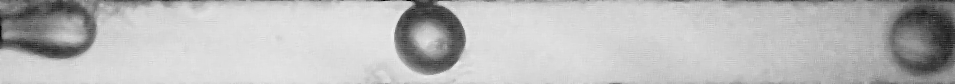

result image


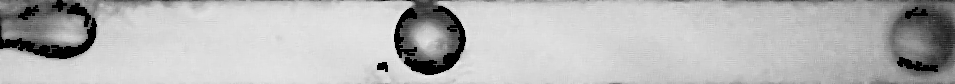

In [ ]:
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0600.jpg', 0)
img = img[86:170, 325:]

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)

#медианный фильтр
img  = cv2.medianBlur(img,5)


#закрашиваем блики
thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,  cv2.THRESH_BINARY, 11, 2) # Адаптивное пороговое значение для выделения бликов

thresh_inv = cv2.bitwise_not(thresh) # Инверсия изображения, чтобы блики стали белыми

kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh_inv, cv2.MORPH_OPEN, kernel)# Применение морфологической операции открытия для удаления мелких шумов
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) # Нахождение контуров бликов
result = img.copy() # Копируем оригинальное изображение для закрашивания бликов

# Закрашиваем все блики (и внутренние области) черным цветом
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:  # Фильтруем слишком маленькие участки (шумы)
        # Закрашивание всей области внутри контура черным цветом
        cv2.drawContours(result, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)


#results
print("original image")
cv2_imshow(img)
print("result image")
cv2_imshow(result)

Поиск контуров (+-)

In [ ]:
img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
img =

# тестирую фильтры для обработки изображений

https://docs.opencv.org/3.4/dd/d1a/group__imgproc__feature.html#ga47849c3be0d0406ad3ca45db65a25d2d

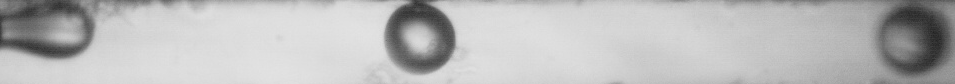

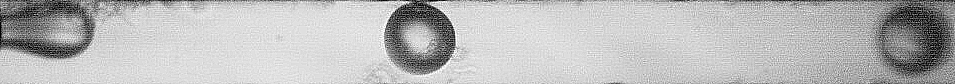

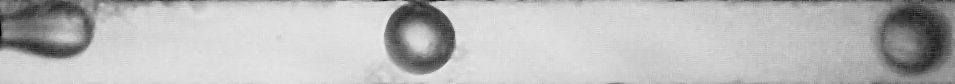

поиск окружностей с помощью  HoughCircles()


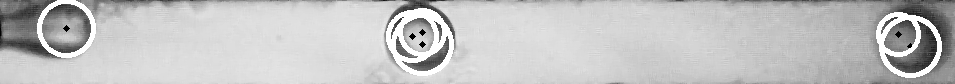

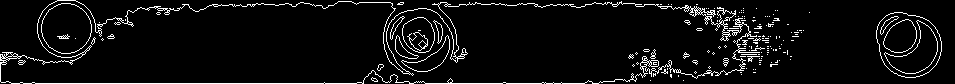

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg', 0)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
'''clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2_imshow(img2)'''


#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)

#черный и белый
#ret, median_image = cv2.threshold(median_image, 111, 255, 0)
#cv2_imshow(median_image)


#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

#поищем контур
img_grey = median_image
#зададим порог
thresh = 200

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)

#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

#создадим пустую картинку
img_contours = np.zeros(median_image.shape)

#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2_imshow(img_contours) # выводим итоговое изображение в окно

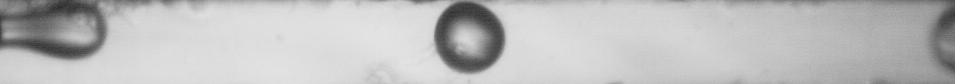

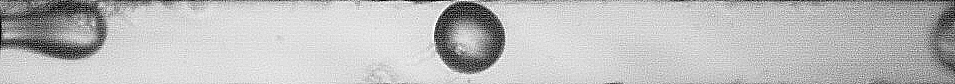

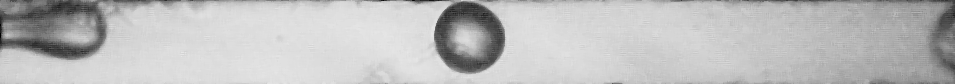

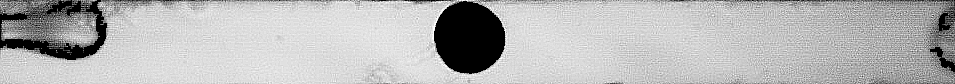

поиск окружностей с помощью  HoughCircles()


error: OpenCV(4.10.0) /io/opencv/modules/imgproc/src/hough.cpp:2309: error: (-211:One of the arguments' values is out of range) when using HOUGH_GRADIENT_ALT method, param2 parameter must be smaller than 1.0 in function 'HoughCircles'


In [ ]:
#пробуем закрасить блики
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_3000.jpg', cv2.IMREAD_GRAYSCALE)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img

#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)
imgGPT = median_image

# Адаптивное пороговое значение для выделения бликов
thresh = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                               cv2.THRESH_BINARY, 11, 2)

# Инверсия изображения, чтобы блики стали белыми
thresh_inv = cv2.bitwise_not(thresh)

# Применение морфологической операции открытия для удаления мелких шумов
kernel = np.ones((3, 3), np.uint8)
cleaned = cv2.morphologyEx(thresh_inv, cv2.MORPH_OPEN, kernel)

# Нахождение контуров бликов
contours, _ = cv2.findContours(cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Копируем оригинальное изображение для закрашивания бликов
result = img.copy()

# Закрашиваем все блики (и внутренние области) черным цветом
for contour in contours:
    area = cv2.contourArea(contour)
    if area > 50:  # Фильтруем слишком маленькие участки (шумы)
        # Закрашивание всей области внутри контура черным цветом
        cv2.drawContours(result, [contour], -1, (0, 0, 0), thickness=cv2.FILLED)

cv2_imshow(result)

median_image = result
#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=20, maxRadius=40)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

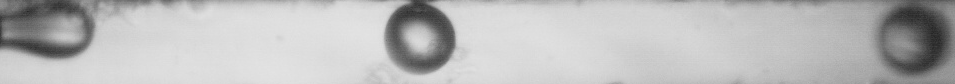

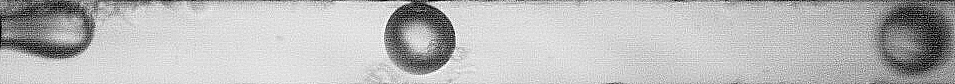

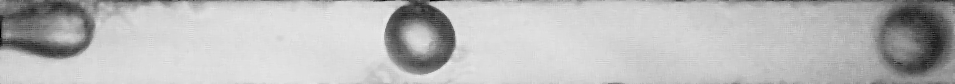

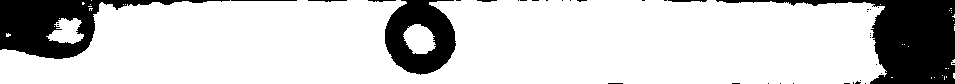

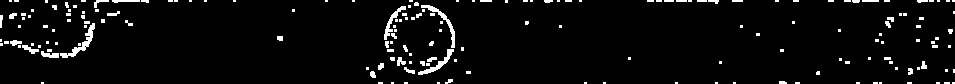

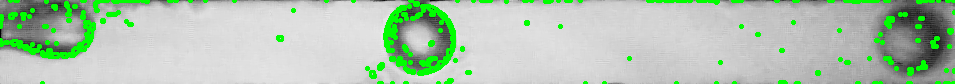

поиск окружностей с помощью  HoughCircles()


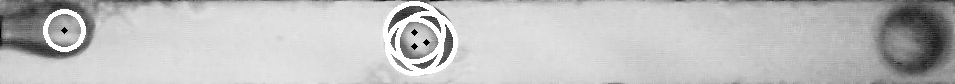

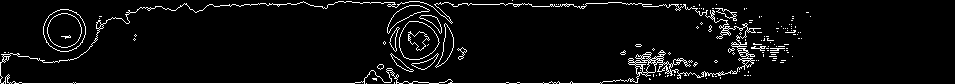

In [ ]:
import cv2

img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0001.jpg', 0)
img = img[86:170, 325:]
cv2_imshow(img)

#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)
median_image = img




# CLAHE (Contrast Limited Adaptive Histogram Equalization)
'''clahe = cv2.createCLAHE(clipLimit=3., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2_imshow(img2)'''


#медианный фильтр
median_image  = cv2.medianBlur(img,5)
cv2_imshow(median_image)
imgGPT = median_image

ret3,th3 = cv2.threshold(imgGPT,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow( th3)
# Адаптивное пороговое значение для получения бинарного изображения
thresh = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Применение морфологической операции открытия для удаления бликов
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
cv2_imshow(opened)

# Поиск контуров
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отрисовка контуров на исходном изображении
result = cv2.cvtColor(imgGPT, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)

# Отображение результата
cv2_imshow( result)

#черный и белый
#ret, median_image = cv2.threshold(median_image, 111, 255, 0)
#cv2_imshow(median_image)


#поищем окружности
print("поиск окружностей с помощью  HoughCircles()")
rows = median_image.shape[0]
circles = cv2.HoughCircles(median_image, cv2.HOUGH_GRADIENT, 1, rows / 8,
                            param1=100, param2=30,
                            minRadius=1, maxRadius=30)


if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
        # circle center
        cv2.circle(median_image, center, 1, (0, 100, 100), 3)
        # circle outline
        radius = i[2]
        cv2.circle(median_image, center, radius, (255, 0, 255), 3)


cv2_imshow(median_image)

#поищем контур
img_grey = median_image
#зададим порог
thresh = 200

#получим картинку, обрезанную порогом
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#надем контуры
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#создадим пустую картинку
img_contours = np.zeros(median_image.shape)
#отобразим контуры
cv2.drawContours(img_contours, contours, -1, (255,255,255), 1)

cv2_imshow(img_contours) # выводим итоговое изображение в окно





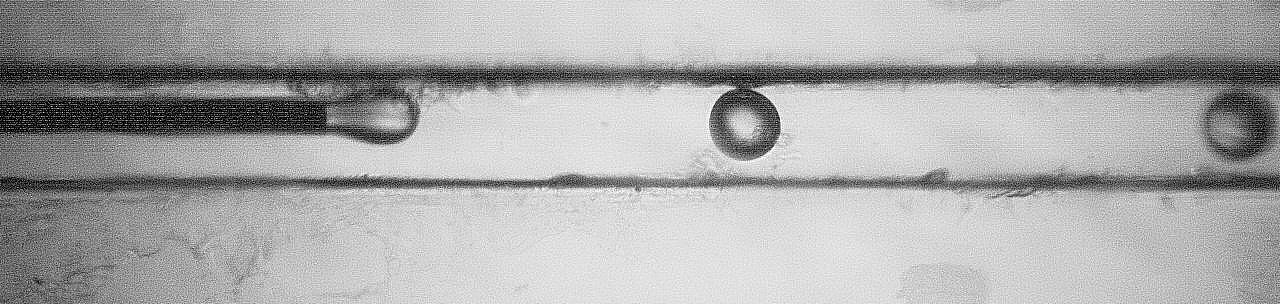

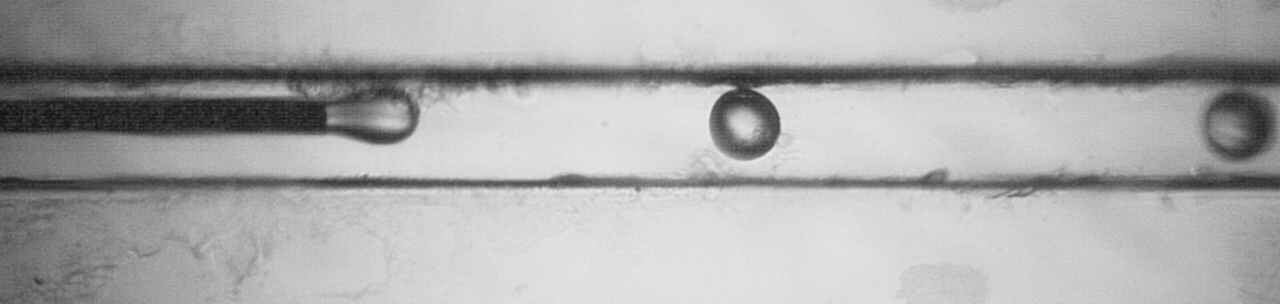

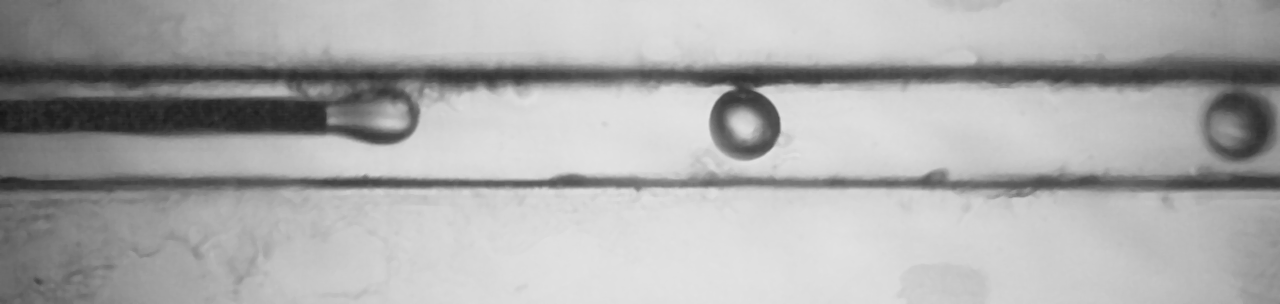

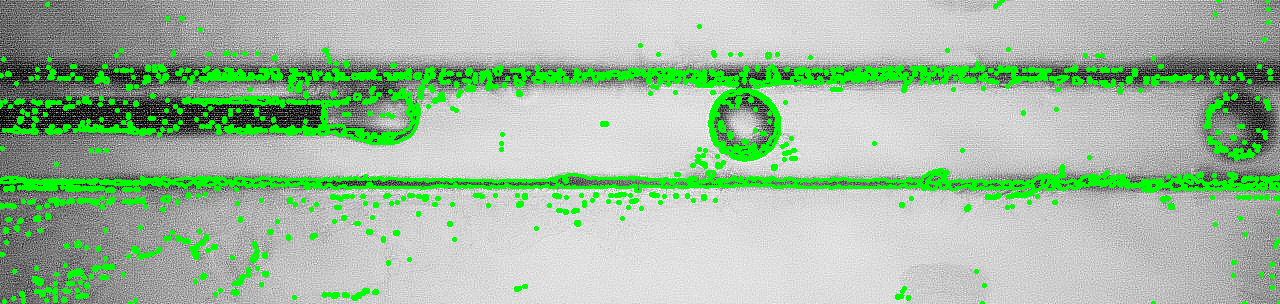

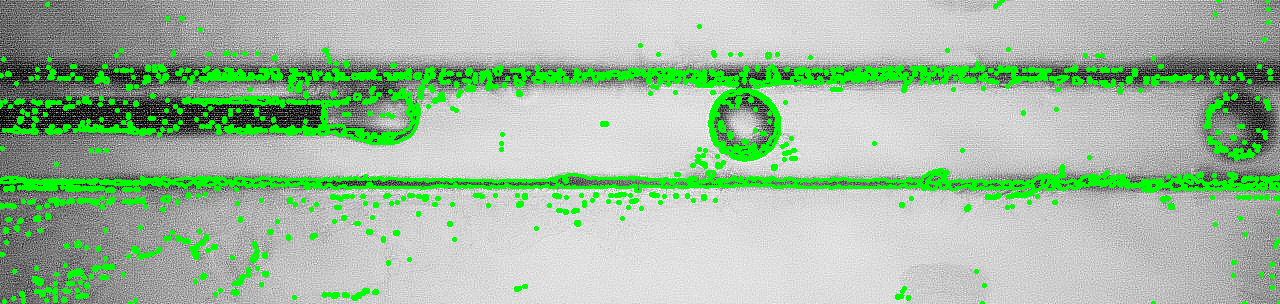


 pepe


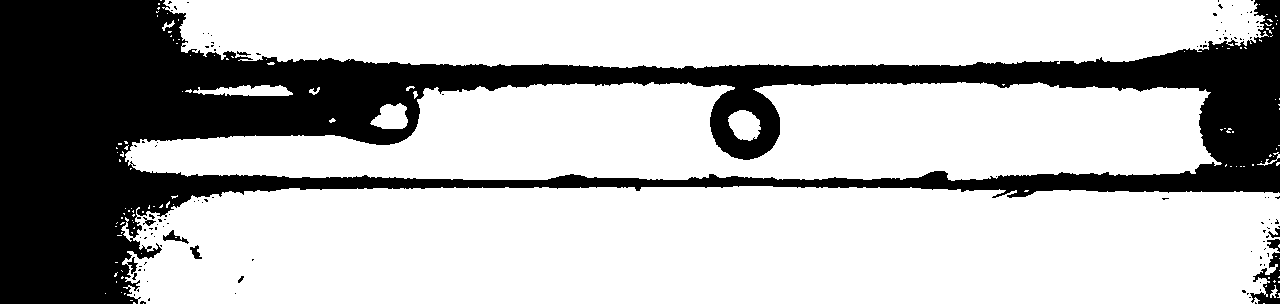

In [ ]:
import cv2
import numpy as np

# Загрузка изображения
img = cv2.imread('/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0001.jpg', cv2.IMREAD_GRAYSCALE)


#увеличение резкости изображения
kernel1 = np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(img, -1, kernel)
cv2_imshow(img)

# Применение фильтра Гаусса для сглаживания бликов
blurred = cv2.GaussianBlur(img, (5, 5), 0)

#медианный фильтр
median_image  = cv2.medianBlur(blurred,1)
cv2_imshow(median_image)
imgGPT = median_image
median_image  = cv2.medianBlur(blurred,5)
cv2_imshow(median_image)


# Адаптивное пороговое значение для получения бинарного изображения
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)
thresh1 = cv2.adaptiveThreshold(imgGPT, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                               cv2.THRESH_BINARY_INV, 11, 2)

# Применение морфологической операции открытия для удаления бликов
kernel = np.ones((3, 3), np.uint8)
opened = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
opened1 = cv2.morphologyEx(thresh1, cv2.MORPH_OPEN, kernel)
# Поиск контуров
contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours1, _ = cv2.findContours(opened1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Отрисовка контуров на исходном изображении
result = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
result1 = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
cv2.drawContours(result, contours, -1, (0, 255, 0), 2)
cv2.drawContours(result1, contours1, -1, (0, 255, 0), 2)

# Отображение результата
cv2_imshow( result)
cv2_imshow( result1)


print("\n pepe")
# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2_imshow( th3)

cv2.waitKey(0)
cv2.destroyAllWindows()

https://stackoverflow.com/questions/35854197/how-to-use-opencvs-connectedcomponentswithstats-in-python



https://docs.opencv.org/4.x/d7/d4d/tutorial_py_thresholding.html


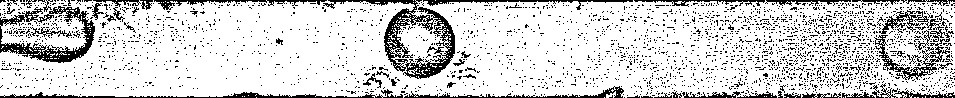

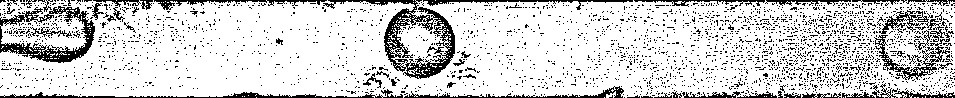

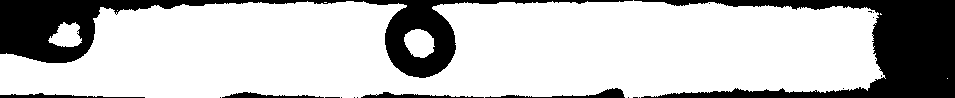

[[537.30182076  41.37159438]
 [461.39328661  50.97255307]
 [325.           2.        ]
 [117.          10.        ]
 [880.33333333  13.66666667]
 [ 66.30472855  35.39579685]
 [419.04797601  42.70164918]
 [947.          78.        ]]


In [ ]:
frame_to_cut = '/content/drive/MyDrive/dataset_nsu_senProj/result/sample_video_img_0000.jpg'
frame = cv2.imread(frame_to_cut, 0)
img = frame[82:180, 325:]

ret, thresh = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

####################
pepe = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
####################

# You need to choose 4 or 8 for connectivity type
connectivity = 4
# Perform the operation
output = cv2.connectedComponentsWithStats(thresh, connectivity, cv2.CV_32S)
# Get the results
# The first cell is the number of labels
num_labels = output[0]
# The second cell is the label matrix
labels = output[1]
# The third cell is the stat matrix
stats = output[2]
# The fourth cell is the centroid matrix
centroids = output[3]

cv2_imshow(pepe)
cv2_imshow(thresh)
print(centroids)

#Детектирование капель, определение их контура (стандарт)